In [57]:
def load_data(file_name):
    with open(file_name, 'r') as file:
        lines = file.readlines()
        matrix = [[int(value) for value in line.strip().split(',')] for line in lines]
    return matrix

[37, 38, 35, 17, 48, 3, 1, 18, 10, 23, 2, 25, 49, 19, 39, 42, 21, 43, 12, 30, 28, 13, 4, 15, 0, 7, 27, 22, 24, 11, 45, 32, 29, 34, 14, 47, 31, 40, 36, 33, 8, 20, 5, 46, 26, 41, 6, 16, 9, 44]
Iteration 1
Best Route: [41, 7, 38, 35, 33, 22, 6, 9, 44, 23, 30, 25, 2, 10, 17, 48, 21, 49, 1, 39, 28, 13, 4, 37, 42, 20, 14, 19, 15, 24, 40, 11, 26, 0, 32, 47, 31, 12, 45, 36, 27, 43, 5, 46, 18, 8, 29, 16, 34, 3]
Best Distance: 110.0

Iteration 2
Best Route: [41, 7, 1, 22, 33, 43, 24, 25, 30, 46, 44, 23, 2, 10, 35, 48, 21, 49, 6, 39, 28, 13, 4, 37, 8, 20, 14, 19, 15, 38, 17, 11, 26, 0, 32, 47, 31, 12, 45, 36, 27, 40, 5, 9, 18, 42, 29, 16, 34, 3]
Best Distance: 89.0

Iteration 3
Best Route: [41, 7, 1, 22, 33, 43, 24, 25, 5, 46, 44, 23, 2, 10, 35, 48, 21, 49, 6, 39, 28, 13, 4, 37, 8, 20, 14, 19, 15, 38, 17, 11, 26, 0, 32, 47, 31, 12, 45, 36, 27, 40, 30, 9, 18, 42, 29, 16, 34, 3]
Best Distance: 85.0

Final Best Route: [41, 7, 1, 22, 33, 43, 24, 25, 5, 46, 44, 23, 2, 10, 35, 48, 21, 49, 6, 39, 28, 13

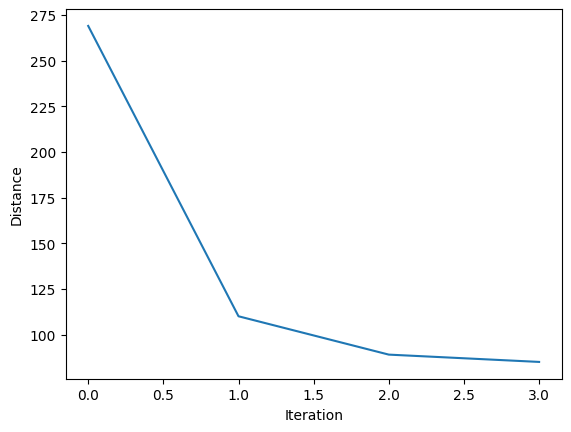

In [58]:
import random
import matplotlib.pyplot as plt
import numpy as np

def calculate_distance(route, distances):
    total_distance = 0
    for i in range(len(route) - 1):
        city1 = route[i]
        city2 = route[i + 1]
        total_distance += distances[city1][city2]
    return total_distance

def steepest_hill_ascent(distances, max_iterations=10):
    num_cities = len(distances)
    current_route = list(range(num_cities))
    random.shuffle(current_route)
    print(current_route)
    best_route = current_route[:]
    best_distance = calculate_distance(best_route, distances)

    distances_history = [best_distance]

    for iteration in range(max_iterations):
        improved = False
        for i in range(num_cities - 1):
            for j in range(i + 1, num_cities):
                new_route = current_route[:]
                new_route[i], new_route[j] = new_route[j], new_route[i]
                new_distance = calculate_distance(new_route, distances)
                if new_distance < best_distance:
                    current_route = new_route[:]
                    best_distance = new_distance
                    improved = True
                    if best_distance < calculate_distance(best_route, distances):
                        best_route = current_route[:]
        if not improved:
            break
        distances_history.append(best_distance)

        if iteration < max_iterations:
            print("Iteration", iteration + 1)
            print("Best Route:", best_route)
            print("Best Distance:", best_distance)
            print()

    return best_route, best_distance, distances_history

# Load data
distances_file = 'TSP_Matrix.txt'

try:
    distances = np.loadtxt(distances_file, delimiter=',')
    best_route, best_distance, distances_history = steepest_hill_ascent(distances, max_iterations=10)
    print("Final Best Route:", best_route)
    print("Final Best Distance:", best_distance)

    # Plot the distance history
    plt.plot(distances_history)
    plt.xlabel("Iteration")
    plt.ylabel("Distance")
    plt.show()

except ValueError as e:
    print("Error reading the distances matrix from the file:", e)


